Deleting the missing value in airbnb dataset

In [23]:
import pandas as pd
import csv

with open('airbnb_rooms.csv') as csv_file:
 
    # creating an object of csv reader
    # with the delimiter as ,
    csv_reader = csv.reader(csv_file, delimiter = ',')
 
 
    # loop to iterate through the rows of csv
    for row in csv_reader:
 
        # adding the first row
        list_of_column_names = row
 
        # breaking the loop after the
        # first iteration itself
        break
        
list_of_column_names.pop(0)
print(list_of_column_names)

# Read the CSV file
df = pd.read_csv('airbnb_rooms.csv')

# Remove rows with empty values in the specified columns
df.dropna(subset = [x for x in list_of_column_names] , inplace=True)


# Write the cleaned dataframe to a new CSV file
df.to_csv('airbnb_output.csv', index=False)

['id', 'scrape_id', 'host_id', 'host_since', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'cancellation_policy', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'cal

One hot encoding

In [24]:
from sklearn import preprocessing   
my_label = preprocessing.LabelEncoder()  
# df[ 'host_identity_verified','neighbourhood_cleansed','is_location_exact','property_type','room_type','bed_type','cancellation_policy' ]= my_label.fit_transform(df['host_identity_verified','neighbourhood_cleansed','is_location_exact','property_type','room_type','bed_type','cancellation_policy' ])
# print(df[ 'host_identity_verified','neighbourhood_cleansed','is_location_exact','property_type','room_type','bed_type','cancellation_policy''scrape_id','host_identity_verified','neighbourhood_cleansed','is_location_exact','property_type','room_type','bed_type','cancellation_policy' ].unique())  
# print(df) 
for i in ['host_identity_verified','neighbourhood_cleansed','is_location_exact','property_type','room_type','bed_type','cancellation_policy']:
    df[i]= my_label.fit_transform(df[i])
    print(df[i].unique())


[1 0]
[18 19 32 31  1 17 26 13 11 27 29 12 30  3  5 21  7 23 22  8 24  9  6  0
 10 16 14  4 25 20 15  2 28]
[1 0]
[0 2 4 1 3]
[1 0]
[0]
[1 3 0 5 2 4]


Feature selection

0.32528327502455356


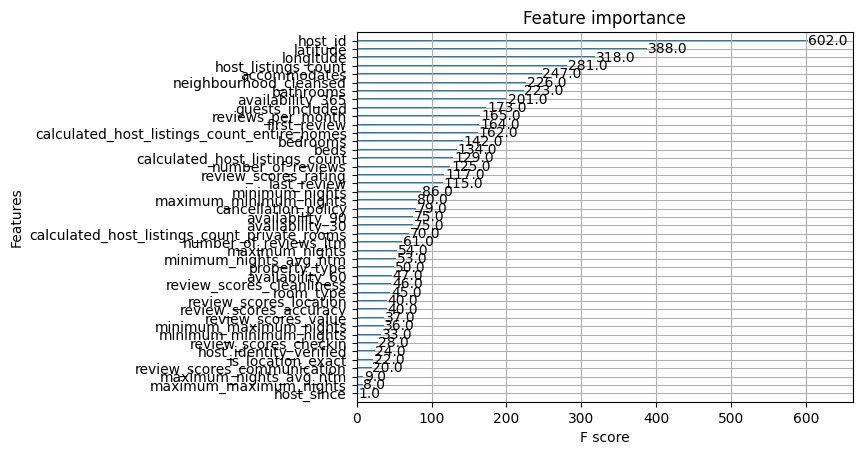

In [30]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
# load data
# split data into X and y
airbnb_features = ['host_id', 'host_since', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'cancellation_policy', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
X = df[airbnb_features]
y = df.price
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)
# plot feature importance
accuracy = model.score(X_test, y_test)
print(accuracy)
plot_importance(model)
pyplot.show()

Object `XGBRegressor` not found.
